#PROYECTO: Extacción de conocimiento de IOT


In [2]:
# Cargar el set de datos en el CLOUD

!pip install xlrd
from google.colab import files
uploaded = files.upload()

Saving Sensores_iot.xls to Sensores_iot.xls


In [0]:
#2 importar librerias
import pandas as pd #libreria para trabajar matrices de datos
import matplotlib.pyplot as plt #libreria de visualizaciones
import seaborn as sns #frame de visualizaciones sobre matplotlib
import numpy as np
%matplotlib inline 
#mostrar las visualizaciones en el entorno de manera predeterminada.

In [4]:
df = pd.read_excel('Sensores_iot.xls')
df.head()

,Sensores1,Sensores2,Sensores3,Sensores4,Sensores5,Sensores6,Sensores7,Sensores8,Sensores9,Target
0,0.38,0.53,2,157,3,0,1,0,0.8,low
1,0.80,0.86,5,262,6,0,1,0,0.1,medium
2,0.11,0.88,7,272,4,0,1,0,0.3,medium
3,0.72,0.87,5,223,5,0,1,0,0.7,low
4,0.37,0.52,2,159,3,0,1,0,0.9,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Sensores1    14999 non-null float64
Sensores2    14999 non-null float64
Sensores3    14999 non-null int64
Sensores4    14999 non-null int64
Sensores5    14999 non-null int64
Sensores6    14999 non-null int64
Sensores7    14999 non-null int64
Sensores8    14999 non-null int64
Sensores9    14999 non-null float64
Target       14999 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 1.1+ MB


In [6]:
df.isnull().any()

Sensores1    False
Sensores2    False
Sensores3    False
Sensores4    False
Sensores5    False
Sensores6    False
Sensores7    False
Sensores8    False
Sensores9    False
Target       False
dtype: bool

In [7]:
print(len(df["Target"].unique()))
df["Target"].unique()

3


array(['low', 'medium', 'high'], dtype=object)

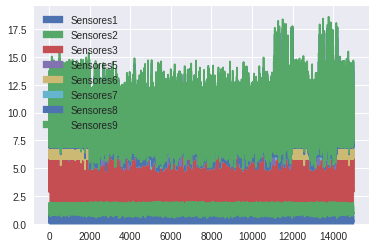

In [8]:
df[["Sensores1",	"Sensores2",	"Sensores3",	"Sensores5",	"Sensores6",	"Sensores7",	"Sensores8",	"Sensores9"]].plot.area()

#Preparación de los datos

---



In [9]:
print(df.shape)
df.dtypes

(14999, 10)


Sensores1    float64
Sensores2    float64
Sensores3      int64
Sensores4      int64
Sensores5      int64
Sensores6      int64
Sensores7      int64
Sensores8      int64
Sensores9    float64
Target        object
dtype: object

In [10]:
# Display the statistical overview of the dataset
df.describe()

,Sensores1,Sensores2,Sensores3,Sensores4,Sensores5,Sensores6,Sensores7,Sensores8,Sensores9
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.452143
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.286193
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.200000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.500000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.700000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,0.900000


In [11]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('Target')
turnover_Summary.mean()

,Sensores1,Sensores2,Sensores3,Sensores4,Sensores5,Sensores6,Sensores7,Sensores8,Sensores9
Target,,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205,0.455538
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021,0.452679
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079,0.450884


In [12]:
turnover_Summary.std()

,Sensores1,Sensores2,Sensores3,Sensores4,Sensores5,Sensores6,Sensores7,Sensores8,Sensores9
Target,,,,,,,,,
high,0.226791,0.158608,1.088684,47.710446,1.977885,0.362255,0.248888,0.234226,0.292537
low,0.254594,0.173261,1.281822,50.832214,1.303818,0.349232,0.456916,0.094558,0.284793
medium,0.245069,0.171043,1.201232,49.344188,1.506442,0.352492,0.403230,0.165213,0.286584


## Resultados

,Sensores1,Sensores2,Sensores3,Sensores4,Sensores5,Sensores6,Sensores7,Sensores8,Sensores9
Sensores1,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.007100
Sensores2,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.004808
Sensores3,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.002621
Sensores4,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.003543
Sensores5,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.002883
Sensores6,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.007551
Sensores7,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.005850
Sensores8,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.011681
Sensores9,-0.007100,0.004808,-0.002621,-0.003543,-0.002883,-0.007551,0.005850,-0.011681,1.000000


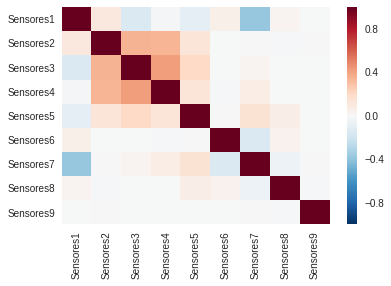

In [13]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

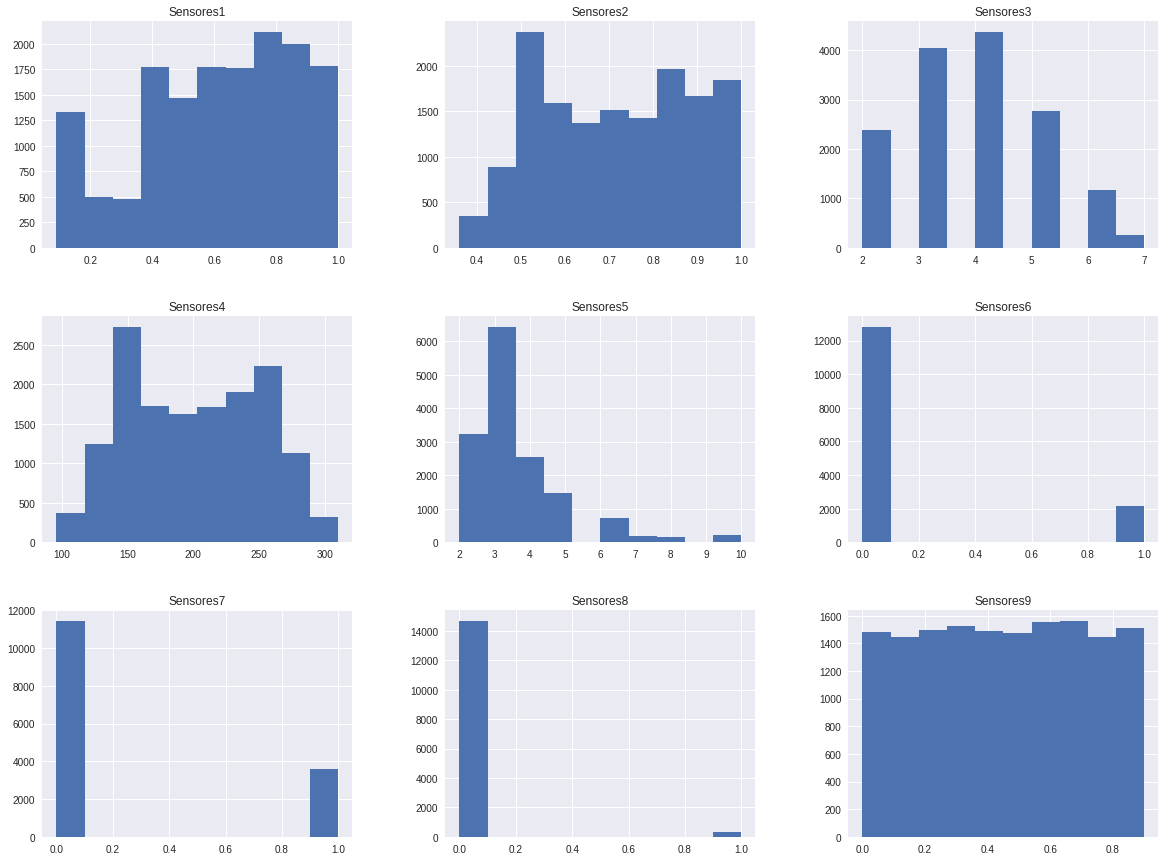

In [14]:


#ahora hacemos algunos histogramas
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
#plt.savefig("hr_histogram_plots")
plt.show()

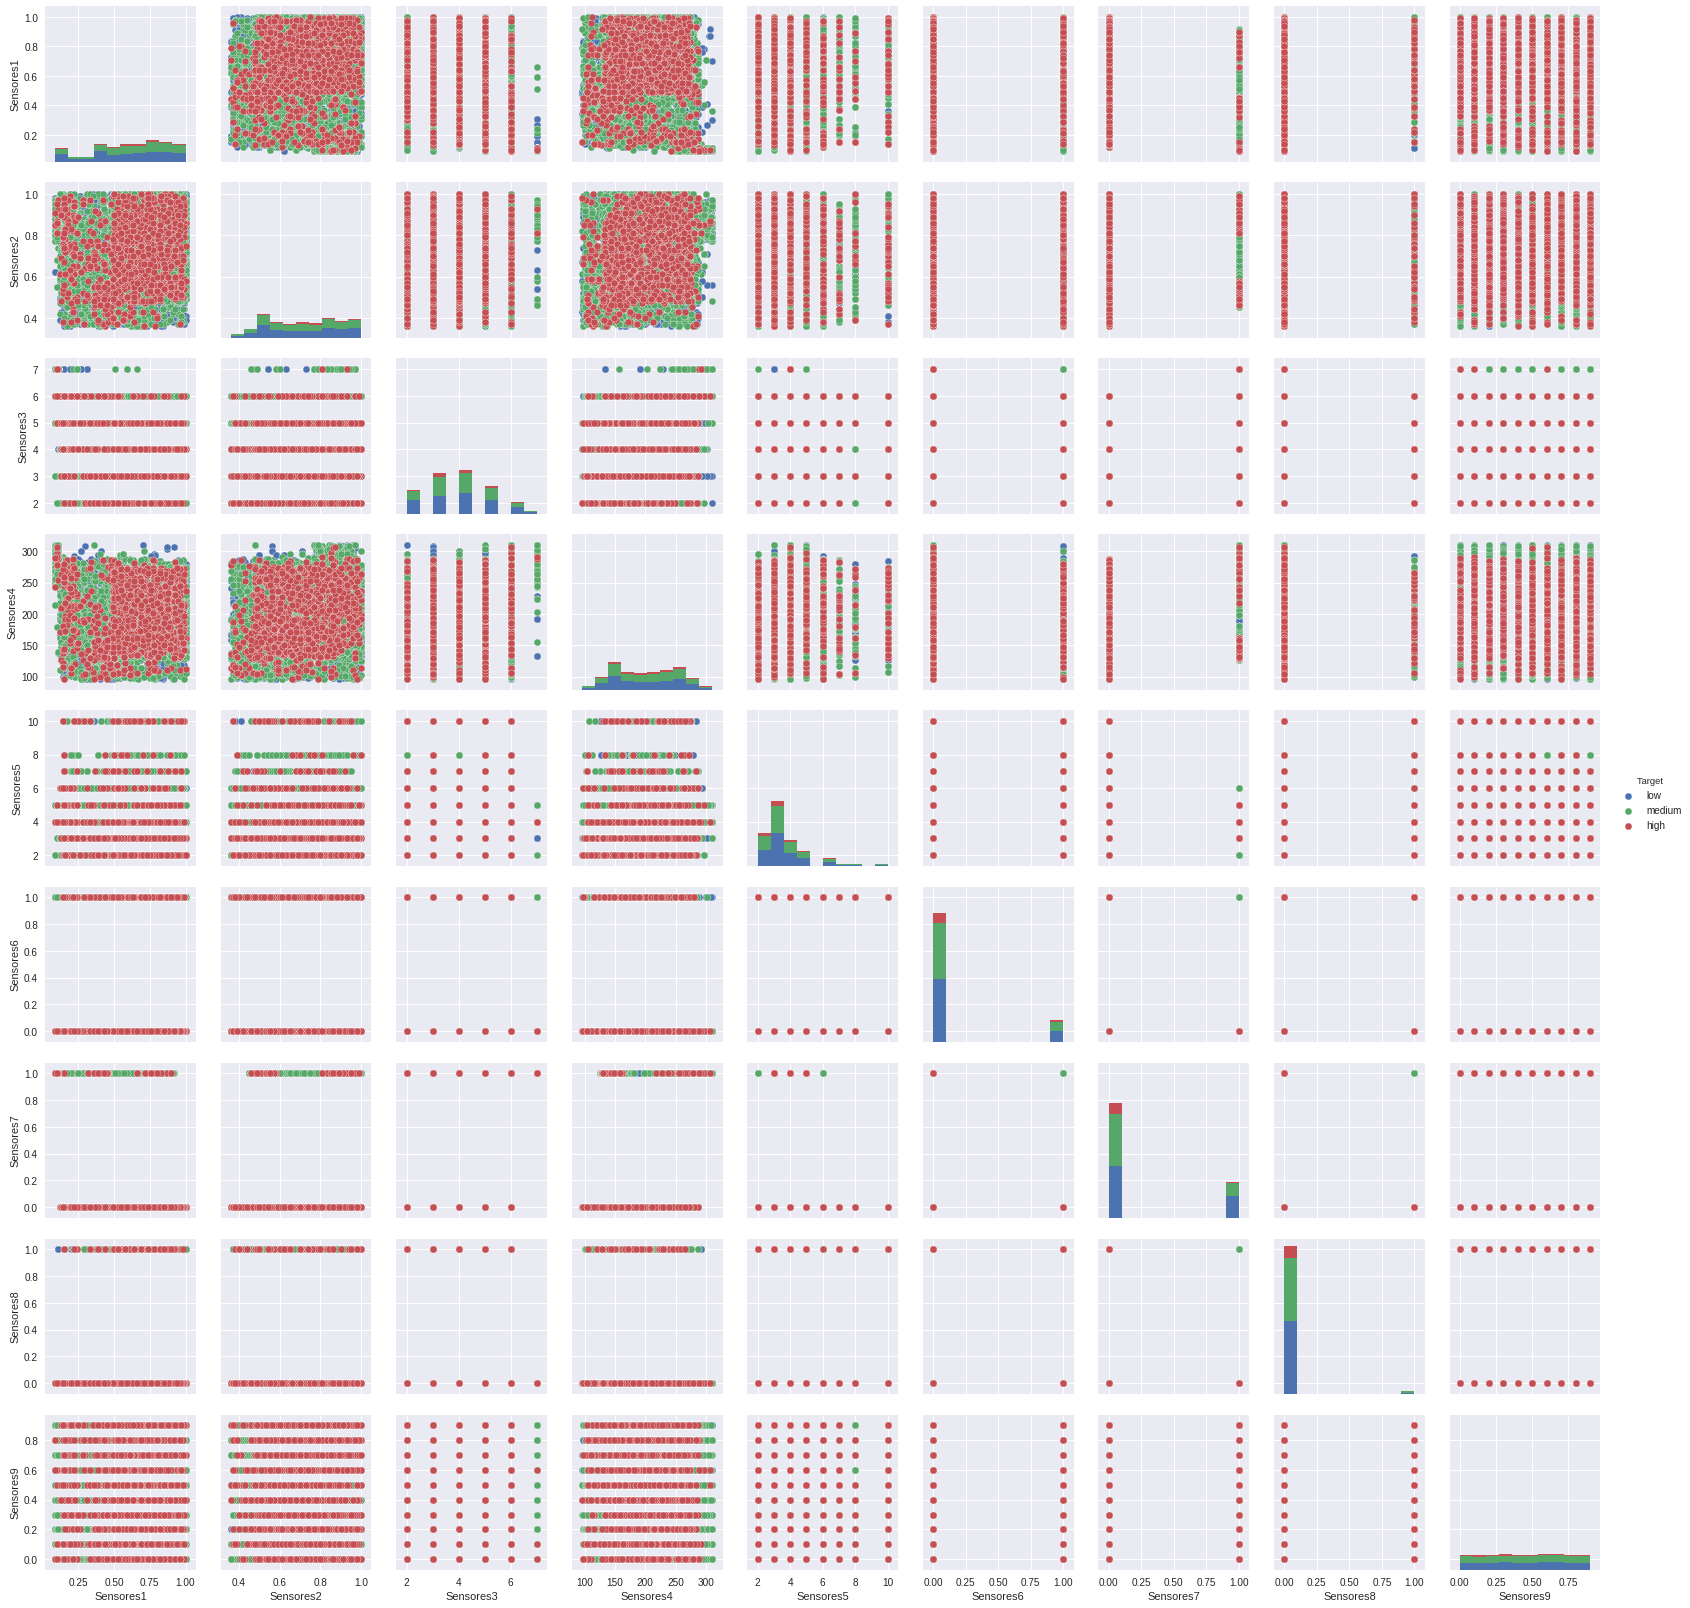

In [15]:
sns.pairplot(df, hue="Target")

In [0]:
# Estandarizamos los datos
from sklearn import preprocessing
df_scaled = df
df_scaled.iloc[:,:-1] = preprocessing.scale(df_scaled.iloc[:,:-1])

In [0]:
# Dividimos Dataset en test y train
from sklearn.model_selection import train_test_split
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
# Aplicamos el modelo y vemos qué features son más influyentes
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=2)

clf.fit(X_train,y_train)
print(clf.feature_importances_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.09 0.02 0.07 0.03 0.21 0.   0.43 0.14 0.  ]


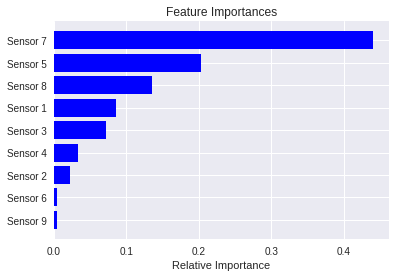

In [67]:
features = ["Sensor "+str(i) for i in range(1,10)]
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()